In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
train = pd.read_csv("train.csv", parse_dates=['Dates'])

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 67.0+ MB


In [40]:
print train.Category.unique()
train.groupby('DayOfWeek').Category.describe()

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


DayOfWeek        
Friday     count            133734
           unique               39
           top       LARCENY/THEFT
           freq              27104
Monday     count            121584
           unique               39
           top       LARCENY/THEFT
           freq              23570
Saturday   count            126810
           unique               39
           top       LARCENY/THEFT
           freq              27217
Sunday     count            116707
           unique               38
           top       LARCENY/THEFT
           freq              24150
Thursday   count            125038
           unique               39
           top       LARCENY/THEFT
           freq              24415
Tuesday    count            124965
           unique               39
           top       LARCENY/THEFT
           freq              23957
Wednesday  count            129211
           unique               38
           top       LARCENY/THEFT
           freq              24487
dt

In [41]:
train.groupby('PdDistrict').Category.describe()

PdDistrict        
BAYVIEW     count              89431
            unique                39
            top       OTHER OFFENSES
            freq               17053
CENTRAL     count              85460
            unique                39
            top        LARCENY/THEFT
            freq               25060
INGLESIDE   count              78845
            unique                37
            top       OTHER OFFENSES
            freq               13203
MISSION     count             119908
            unique                39
            top       OTHER OFFENSES
            freq               19330
NORTHERN    count             105296
            unique                39
            top        LARCENY/THEFT
            freq               28630
PARK        count              49313
            unique                37
            top        LARCENY/THEFT
            freq                9146
RICHMOND    count              45209
            unique                38
            top    

In [32]:
train.Category.value_counts()[:5]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
Name: Category, dtype: int64

#### dates:
from 1/1/2003 to 5/13/2015

In [11]:
train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

In [18]:
train = train.drop('Dates', axis = 1)
train = train.drop('Resolution', axis = 1)

In [19]:
train.head()

,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Week,Hour
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,20,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,20,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,20,23


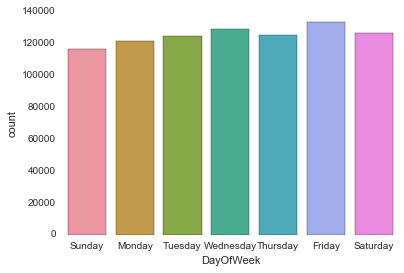

In [23]:
sns.countplot(x = "DayOfWeek", data = train, 
              order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

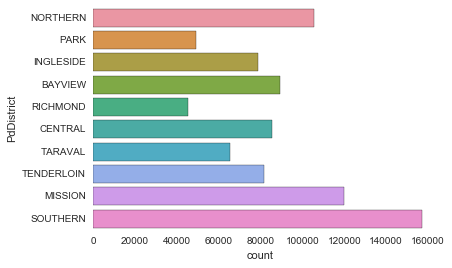

In [27]:
df_grouped = df.groupby(['PdDistrict']).sum().amount.reset_index()

sns.countplot(y = "PdDistrict", data = train)

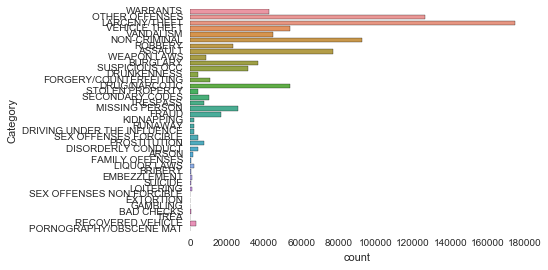

In [29]:
sns.countplot(y = "Category", data = train)

In [31]:
train.shape

(878049, 10)

long